## Multiple Liner Regression for CO2 Emission.

#Importing packages


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## Load the data

In [27]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

# Fuel_Consumption.csv

- **MODEL YEAR** e.g. 2014
- **MAKE** e.g. VOLVO
- **MODEL** e.g. S60 AWD
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 3.0
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. AS6
- **FUEL TYPE** e.g. Z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 13.2
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 9.5
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 11.5
- **FUEL CONSUMPTION COMBINED MPG (MPG)** e.g. 25
- **CO2 EMISSIONS (g/km)** e.g. 182 


In [28]:
df = pd.read_csv(url)

df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
833,2014,NISSAN,370Z,TWO-SEATER,3.7,6,M6,Z,13.3,9.3,11.5,25,264
670,2014,LEXUS,LS 460 AWD,MID-SIZE,4.6,8,AS8,Z,15.1,10.3,12.9,22,297
789,2014,MINI,COOPER PACEMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179
603,2014,KIA,FORTE,MID-SIZE,2.0,4,A6,X,9.8,6.6,8.4,34,193
314,2014,DODGE,DART,MID-SIZE,2.0,4,M6,X,9.4,6.5,8.1,35,186


In [29]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Dropping useless columns

In [30]:
df = df.drop(["MODELYEAR","MAKE","MODEL","VEHICLECLASS","FUELTYPE","TRANSMISSION"], axis=1)

# Finding correlation amoung the features.

In [31]:
df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
988,1.5,4,4.6,4.9,4.7,60,108
618,2.0,4,10.5,7.5,9.2,31,212
268,5.3,8,21.5,14.6,18.4,15,294
61,4.0,8,14.2,9.7,12.2,23,281
131,4.4,8,16.3,10.9,13.9,20,320


In [32]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


#'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

Similarly, each of the four fuel economy variables is highly correlated with each other. Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, we can drop the others: 'FUELCONSUMPTION_CITY,' 'FUELCONSUMPTION_HWY,' 'FUELCONSUMPTION_COMB.'

In [33]:
df = df.drop(["CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB",], axis=1)

In [34]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


# Plotting the graph using Pandas.

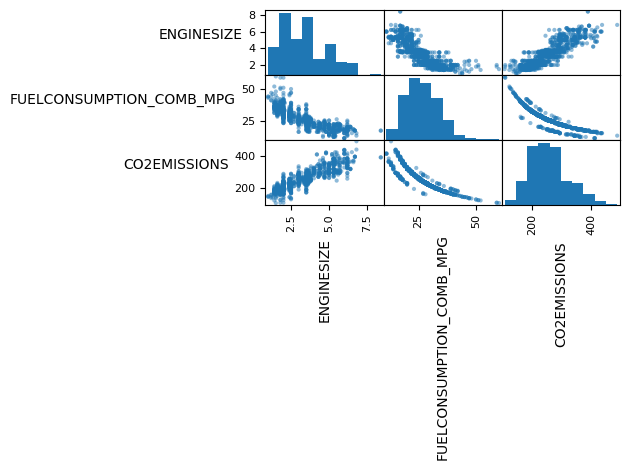

In [35]:
axes = pd.plotting.scatter_matrix(df)

#Rotate Axis lable
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90) #Rotate x axis 90 degrees
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right") #set lables to right side to remove overlapping

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0) #Remove white spaces
plt.show()

Extract the first 2 columns "ENGINESIZE" & "FUELCONSUMPTION_COMB_MPG" then convert them into numpy arrays.
Also the co2 emission as 2 numpy array.

In [36]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

## Standarize the input features.
 A standardized variable has zero mean and a standard deviation of one.

In [37]:
from sklearn import preprocessing

std_scalar = preprocessing.StandardScaler()
X_std = std_scalar.fit_transform(X)

In [38]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


A standardized variable has zero mean and a standard deviation of one.

## Creating Training and Test data.
Training dataset = 80% and Testing dataset = 20%

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

## Building a Multiple Linaer Regression Model

In [40]:
from sklearn import linear_model

#Model object
regressor = linear_model.LinearRegression()

#Trainig the model on training data
regressor.fit(X_train, y_train)

#Printing the coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print("Coefficients:", coef_)
print("Intercept: ", intercept_)
print("This value are for standarized data not the original data.")

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]
This value are for standarized data not the original data.


## Reverse Standarize

Formulas:
                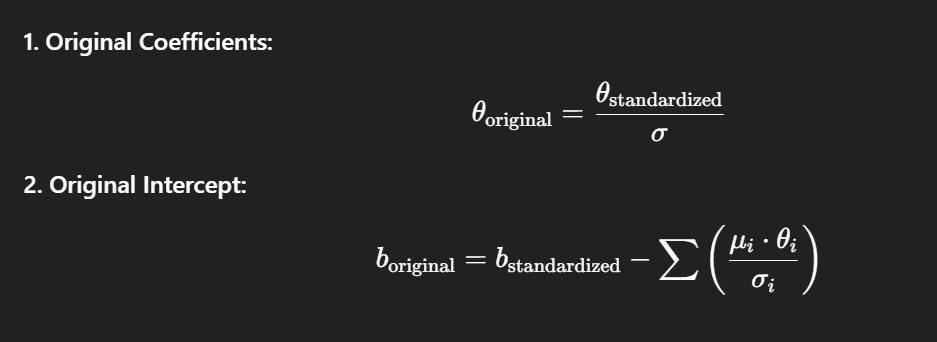

In [41]:
means_ = std_scalar.mean_                   # μ_i: mean of each original feature
std_devs_ = np.sqrt(std_scalar.var_)         # σ_i: standard deviation of each feature


# Formula to convert coefficients from standardized to original scale:
# coef_original[i] = coef_[i] / σ_i
# This rescales each standardized coefficient to the original feature's unit
coef_original = coef_ / std_devs_


# Formula to convert the intercept:
# intercept_original = intercept_ - sum( (μ_i * coef_[i]) / σ_i )
# This adjusts the intercept to match the shifted (non-zero-mean) input space
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_ )


print("Original Coefficients: ", coef_original)
print("Original Intercept: ", intercept_original)

Original Coefficients:  [[17.8581369  -5.01502179]]
Original Intercept:  [329.1363967]


### Visualize model outputs


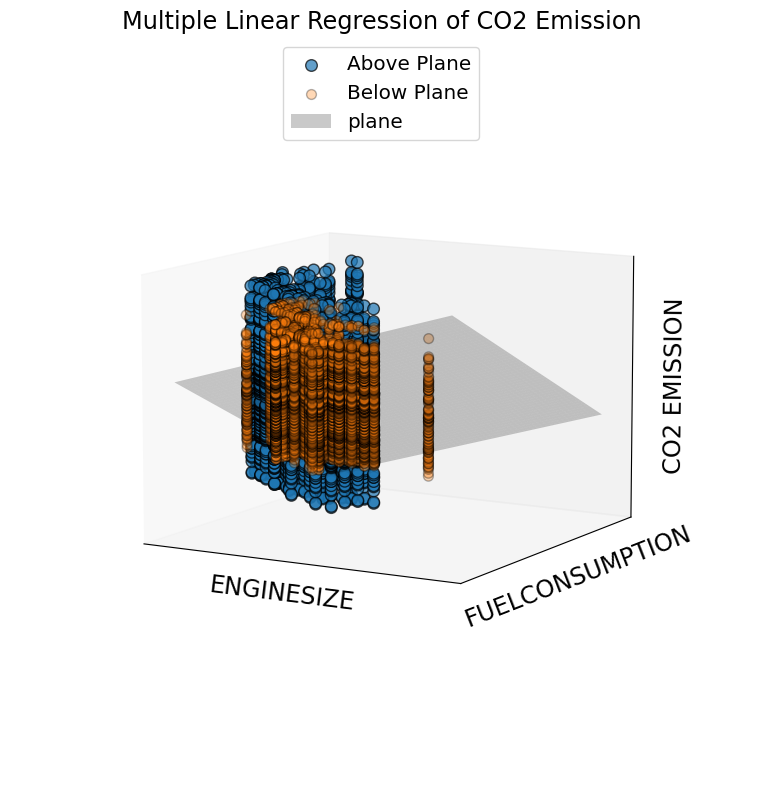

In [54]:
# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X2.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ + coef_[0,0] * X1_surf + coef_[0,1] * X2_surf 

#Prdicting y values using trained model to comapre with actual y_test.
y_pred = regressor.predict(X_test.reshape(-1,1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]


#Plotting
fig =plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection = "3d")  #111 -> 1 row, 1 column, 1st subplot 


#Plotting the data points above and below the plane in diff. colors.
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],   # x, y, and z coordinates of points above the plane.  
           label = "Above Plane", s=70, alpha = .7, ec="k")         # s -> size of scatter point, aplha -> Opacity = 70%, ec -> Edge color = black ('k'), to outline the dots.

ax.scatter(X1[below_plane], X2[below_plane], y_pred[below_plane],
            label = "Below Plane", s=50, alpha=.3, ec="k")


#Plot the regression plane
ax.plot_surface(X1_surf, X2_surf, y_surf, color = "k", alpha = .21, label = "plane")


#Set the views and label
ax.view_init(elev=10)  #Sets the elevation angle (height) of the 3D camera, 10 degrees from the horizontal plane.

ax.legend(fontsize = "x-large", loc = "upper center")  #Adds a legend for labels like "Above Plane" and "Below Plane".
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])   #Hides tick marks on X, Y, and Z axes for a cleaner look.
ax.set_box_aspect(None, zoom = 0.75)   #Controls the aspect ratio of the plot box, zoom=0.75 zooms out to 75% of the default size, making it less cramped, None auto-scales based on data.
ax.set_xlabel("ENGINESIZE", fontsize = "xx-large")
ax.set_ylabel("FUELCONSUMPTION", fontsize = "xx-large")
ax.set_zlabel("CO2 EMISSION", fontsize = "xx-large")     #Sets the axis labels with large font sizes matching the features: X₁, X₂, and the target y.
ax.set_title("Multiple Linear Regression of CO2 Emission", fontsize = "xx-large")  #Adds a main title for the whole plot.

plt.tight_layout()  #Adjusts subplot spacing automatically to prevent overlapping labels or axes.
plt.show()

# Plotting each variable separately.

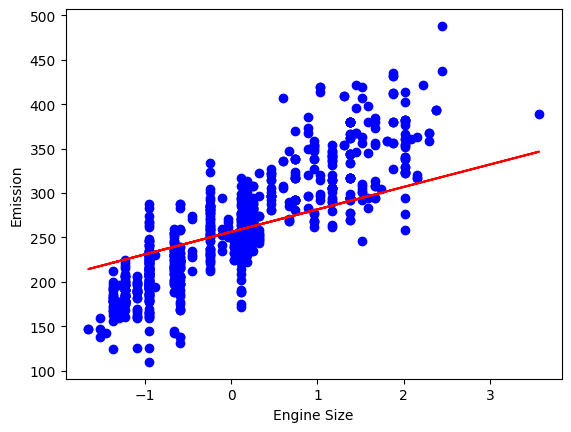

In [46]:
plt.scatter(X_train[:,0], y_train, color = "blue")
plt.plot(X_train[:,0], intercept_[0] + coef_[0,0] * X_train[:,0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

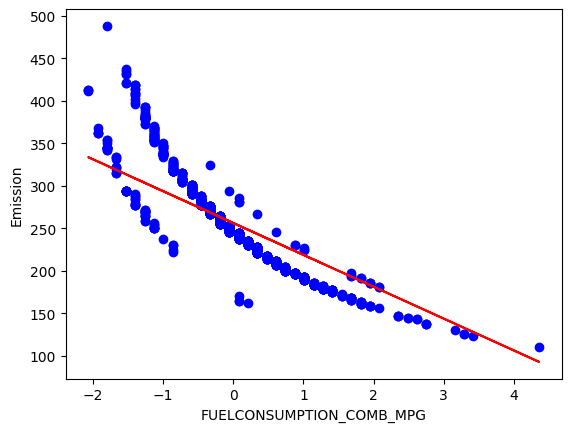

In [48]:
plt.scatter(X_train[:,1], y_train, color = "blue")
plt.plot(X_train[:,1], intercept_[0] + X_train[:,1] * coef_[0,1], "-r")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

The solution is incredibly poor because the model is trying to fit a plane to a non-planar surface.

## Print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.

In [50]:
X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1,1), y_train)
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


# Producing a scatterplot of CO2 emission against ENGINESIZE and include the best-fit regression line to the training data.

Text(0, 0.5, 'Emission')

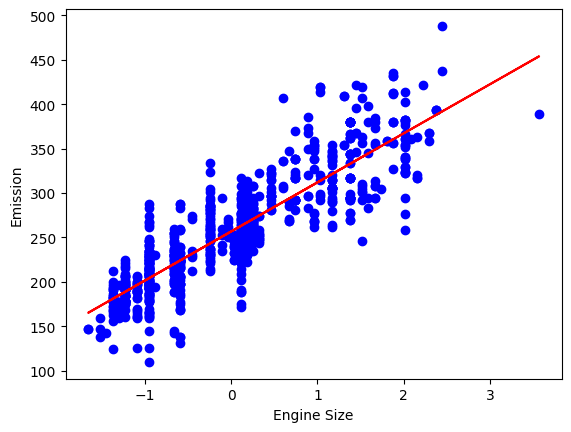

In [52]:
plt.scatter(X_train_1, y_train, color = "blue")
plt.plot(X_train_1, intercept_1[0] + X_train_1 * coef_1[0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")

This simple linear regression model provides a much better fit of CO2 emissions on the training data than the multiple regression model did.

Generating the same scatterplot and best-fit regression line, but now base the result on the test data set

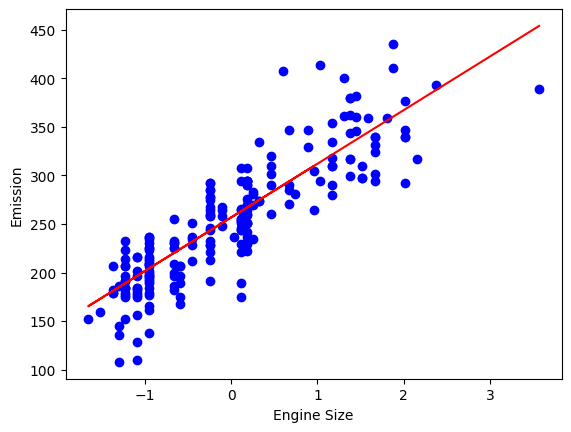

In [56]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test, color = "blue")
plt.plot(X_test_1, intercept_1 + X_test_1 * coef_1[0], "-r")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

# Repeating the same modeling but useing FUELCONSUMPTION_COMB_MPG as the independent variable instead.

In [57]:
X_train_2 = X_train[:,1]

regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1), y_train)

coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_

print("Coef_2", coef_2)
print("intercept_2", intercept_2)

Coef_2 [[-58.51827989]]
intercept_2 [256.09392179]


Generating a scatter plot showing the results as before on the test data

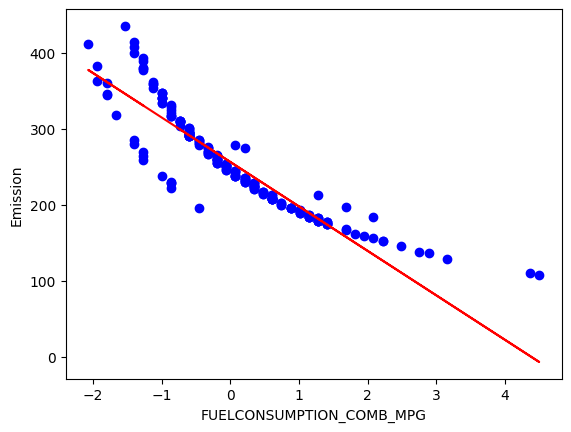

In [59]:
X_test_2 = X_test[:,1]

plt.scatter(X_test_2, y_test, color = "blue")
plt.plot(X_test_2, intercept_2 + coef_2[0] * X_test_2, "-r")
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()